<a href="https://colab.research.google.com/github/ankitadalvi585/Python/blob/main/HeartAttack_Possibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Importing Data from drive
drive.mount('/content/drive')
file_path = ('/content/drive/My Drive/heart.csv')

Mounted at /content/drive


In [2]:
data = pd.read_csv(file_path)

In [4]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 77.7 MB/s eta 0:00:00


In [5]:
import sweetviz

In [6]:
my_report=sweetviz.analyze([data,'Data'])

                                             |          | [  0%]   00:00 -> (? left)

In [7]:
my_report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
#Shape of the data
data.shape

(303, 14)

In [16]:
#Datatype of each column
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [17]:
#Basic Stats of the data
data.describe().astype(int)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
mean,54,0,0,131,246,0,0,149,0,1,1,0,2,0
std,9,0,1,17,51,0,0,22,0,1,0,1,0,0
min,29,0,0,94,126,0,0,71,0,0,0,0,0,0
25%,47,0,0,120,211,0,0,133,0,0,1,0,2,0
50%,55,1,1,130,240,0,1,153,0,0,1,0,2,1
75%,61,1,2,140,274,0,1,166,1,1,2,1,3,1
max,77,1,3,200,564,1,2,202,1,6,2,4,3,1


In [18]:
#To check if any Null value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
data.duplicated().sum()
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [23]:
print(X)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


***Logistic Regression***

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
print('R-squared for Logistic Regression model: ', logreg.score(X_test, y_test)) #Rsquared for log reg model
y_pred_log = logreg.predict(X_test)

R-squared for Logistic Regression model:  0.8524590163934426


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

my_matrix = confusion_matrix(y_test, y_pred_log)
print(my_matrix)
print('Accuracy: ', accuracy_score(y_test, y_pred_log))
print('Precision: ', precision_score(y_test, y_pred_log))
print('F1 score: ', f1_score(y_test, y_pred_log))

[[22  5]
 [ 4 30]]
Accuracy:  0.8524590163934426
Precision:  0.8571428571428571
F1 score:  0.8695652173913043


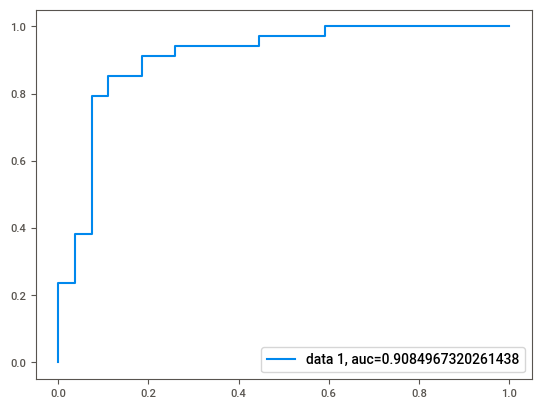

In [31]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = logreg.predict_proba(X_test)[:,1]
FPR, TPR, Threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for Logistic regression model is 0.9084.

There is 90.84% chance that model will be able to distinguish between 0's and 1's

**Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,criterion = 'entropy')

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
print('R-squared for Decision Tree: ', dt.score(X_test,y_test))

R-squared for Decision Tree:  0.8032786885245902


In [38]:
y_pred_dt = dt.predict(X_test)

In [39]:
my_matrix = confusion_matrix(y_test, y_pred_dt)
print(my_matrix)
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('Precision: ', precision_score(y_test, y_pred_dt))
print('F1 score: ', f1_score(y_test, y_pred_dt))

[[22  5]
 [ 7 27]]
Accuracy:  0.8032786885245902
Precision:  0.84375
F1 score:  0.8181818181818182


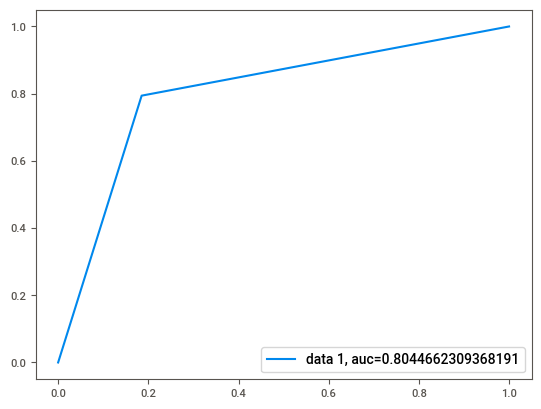

In [40]:
y_pred_proba = dt.predict_proba(X_test)[:,1]
FPR, TPR, Threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for Decision Tree model is 0.8044.

There is 80.44% chance that model will be able to distinguish between 0's and 1's

***Random Forest Classifier***

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
print('R-squared for Decision Tree: ', rfc.score(X_test,y_test))

R-squared for Decision Tree:  0.8852459016393442


In [43]:
y_pred_dt = rfc.predict(X_test)

In [44]:
my_matrix = confusion_matrix(y_test, y_pred_dt)
print(my_matrix)
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('Precision: ', precision_score(y_test, y_pred_dt))
print('F1 score: ', f1_score(y_test, y_pred_dt))

[[24  3]
 [ 4 30]]
Accuracy:  0.8852459016393442
Precision:  0.9090909090909091
F1 score:  0.8955223880597014


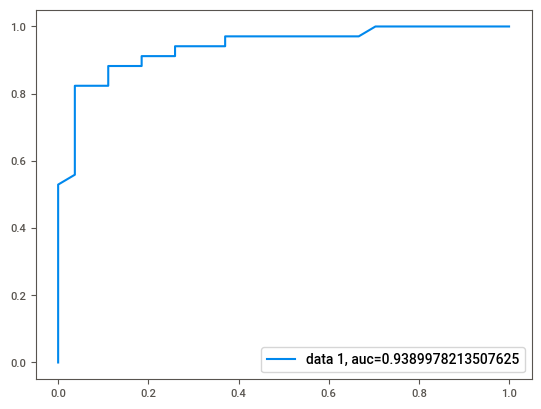

In [45]:
y_pred_proba = rfc.predict_proba(X_test)[:,1]
FPR, TPR, Threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for Random Forest Classifier model is 0.9389.

There is 93.89% chance that model will be able to distinguish between 0's and 1's

***Artificial Neural Network***

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [47]:
#Building ANN using 2 hidden layers with 6 neurons and ReLu activation function, 1 output layer with 1 neuron and activation function as sigmoid
#Uniform kernel initializer sets the initial weights to small random values

classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13)) #13 input features
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [48]:
#Compiling the model using adam optimizer(gradient based optimization, binary cross entropy loss function and track accuracy during training)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
#Training the ANN model
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4380
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5413
Epoch 11/

In [50]:
#Converting the output from neural network into binary value
y_pred_ann = classifier.predict(X_test)
y_pred_output = (y_pred_ann > 0.5)

2/2 [==============================] - 0s 5ms/step


In [51]:
my_matrix = confusion_matrix(y_test, y_pred_output)
print(my_matrix)
print('Accuracy: ', accuracy_score(y_test, y_pred_output))
print('Precision: ', precision_score(y_test, y_pred_output))
print('F1 score: ', f1_score(y_test, y_pred_output))

[[21  6]
 [ 5 29]]
Accuracy:  0.819672131147541
Precision:  0.8285714285714286
F1 score:  0.8405797101449276


***#Random Forest Classifier fits the data well in this case as compared to other models***